
TP4 - Commentaires des blocs de Code

----------------------------------------------------------------------------------------------------------------

(1) BLOC des librairies

time.time                 : permet faire des opérations avec le temps, notamment en mesurant le temps de certaines opérations
logging                   : permet de visualiser les logs de téléchargements des données
matplotlib.pyplot         : permet de visualiser et manipuler des images et de faire des graphiques

sklearn.model_selection   : permet de disposer les données de notre modèle comme on le souhaite
    train_test_split      : permet de disposer les données d'entraînements et de tests
    GridSearchCV          : permet de faire des permutations de paramètres dans nos apprentissages
    cross_val_score       : permet de déterminer le scoring de l'apprentissage

sklearn.datasets          : permet de récupérer des datasets afin de les manipuler avec nos apprentissages
    fetch_lfw_people      : datasets 

predict done in 0.380s
Cross-validation :
Polynome SVM : [0.64348476 0.6823426  0.67848997 0.6821599  0.62716999]
Mean F1-Score : 0.6627294465853014
Best F1-Score : 0.6823426038670851
cross-validation done in 49.696s
Confusion matrix :
[[  3   0   0  16   0   0   0   0   0   0   0   0   0   0   0]
 [  0  35   0  21   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   7  18   0   0   0   0   0   0   0   0   0   0   0]
 [  0   2   0 131   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  20   3   0   1   0   0   0   0   0   0   0   0]
 [  0   0   0  10   0   6   0   0   0   0   0   0   0   0   0]
 [  0   0   0  29   0   0  16   0   0   0   0   0   0   0   0]
 [  0   0   0   5   0   0   0  26   0   0   0   0   0   0   0]
 [  0   0   1   1   0   0   0   0  21   0   0   0   0   0   0]
 [  3   1   0   1   0   0   0   0   0  17   0   0   0   0   0]
 [  0   1   0  24   0   0   1   0   0   0   0   0   0   0   2]
 [  0   0   0  16   0   0   0   0   0   0   0  58   0   0   0]
 [  0   

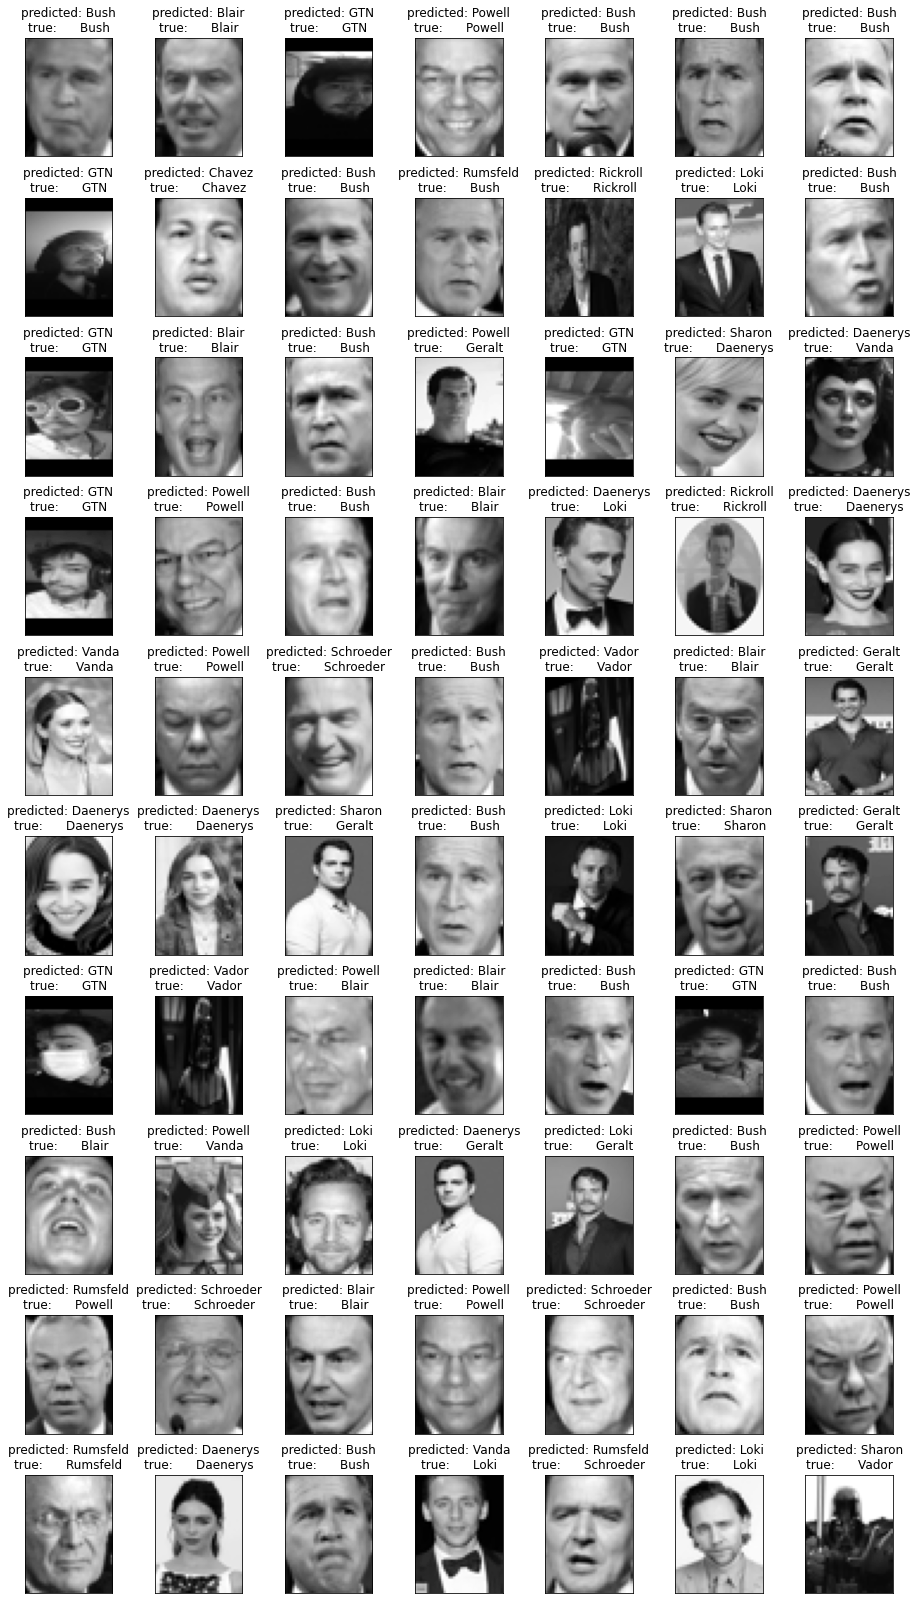

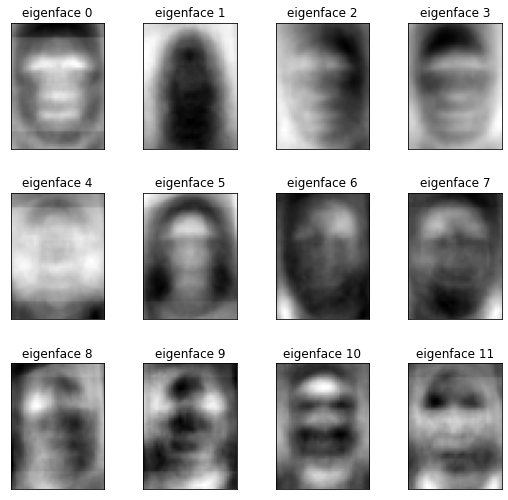

In [19]:
"""
TP3 - Commentaires des blocs de Code

----------------------------------------------------------------------------------------------------------------

(1) BLOC des librairies

time.time                 : permet faire des opérations avec le temps, notamment en mesurant le temps de certaines opérations
logging                   : permet de visualiser les logs de téléchargements des données
matplotlib.pyplot         : permet de visualiser et manipuler des images et de faire des graphiques

sklearn.model_selection   : permet de disposer les données de notre modèle comme on le souhaite
    train_test_split      : permet de disposer les données d'entraînements et de tests
    GridSearchCV          : permet de faire des permutations de paramètres dans nos apprentissages
    cross_val_score       : permet de déterminer le scoring de l'apprentissage

sklearn.datasets          : permet de récupérer des datasets afin de les manipuler avec nos apprentissages
    fetch_lfw_people      : datasets de visages, on l'utilise ici pour récupérer les visages des présidents américains

sklearn.metrics           : permet d'user de différentes métriques dans l'analyse de notre apprentissage
    classification_report : permet de faire un rapport de l'état de la classification effectuée
    confusion_matrix      : permet d'obtenir la matrice de confusion de notre classification 
    
sklearn.decomposition     : permet d'effectuer des manipulations sur les données
    PCA                   : permet d'obtenir l'analyse en composantes principales de nos images
    
sklearn.svm               : permet de manipuler différents algorithmes SVM
    SVC                   : algorithmes SVM
    
sklearn.neural_network    : permet de manipuler des réseaux de neurones
    MLPClassifier         : type de réseau de neurones couramment utilisé
    
sklearn.tree              : permet de manipuler des modèles basés en arbre
    DecisionTreeClassifier: type d'arbre de décision
    
sklearn.ensemble          : permet de manipuler des modèles basés en ensembles
    RandomForestClassifier: permet de manipuler les forêts aléatoires 
    

os                        : permet les opérations sur les fichiers et dossiers

numpy                     : permet une manipulation aisée d'un gros nombre de données

PIL                       : permet des opérations sur les fichiers d'images
    Image                 : utilisé pour ouvrir, rescale et orienter les images
    ImageOps              : utilisé pour les opérations sur Image, comme la conversion en image noir et blanc

----------------------------------------------------------------------------------------------------------------
"""
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import os
import numpy as np
from PIL import Image, ImageOps


# permet d'imprimer les documents
doc = lambda : print(__doc__)
doc()

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')



"""
(2) BLOC des DONNEES


Nous chargeons des têtes de présidents amricains grâce à la fonction fetch_lfw_people

Ces données sont un dictionnaire avec ces différentes clés :

    lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4) 
        (min_faces_per_person sert à retenir les personnes qui ont au moins 70 photos d'eux) (resize redimensionne les photos)
        
    lfw_people.images       : contient des tableaux 2 dimensions (37x50) correspondants aux images (valeurs = nuances de gris)
    lfw_people.data         : contient les images aplaties en tableaux de 1 dimension (37x50 = 1850)
    lfw_people.target       : contient les labels des images (ici un indice)
    lfw_people.target_names : contient les noms des classes 
        (un indice de .target servira à rediriger vers le nom correspondant dans ce tableau des noms)
    lfw_people.DESCR        : description de la base de données, affichable avec print(lfw_people.DESCR)
    
    
+ TP6 Ajout des données

    nous avons des dossiers localements présents avec notre code pour les ajouts de données
    
    On ajoute manuellement nos images à la base existante grâce aux librairies 
    os (trouver les images) et PIL (Pillow) (pour la manipulation des images)
    
    Lorsque nous n'avons pas assez d'images de données, nous sommes amenés à en créer à partir de celles existantes 
    (par rotation des images par exemple)

    A cause de certains mauvais traîtements d'images, certaines images sont très facilement retrouvable et d'autres justement que très peu...
    Mais voir ces soucis de format des images fût très enrichissant !!

"""
doc()
# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape


#################################################################################
# Ajout de données TP6

def path(x):
    if not(os.path.isdir(x)):
        os.mkdir(x)

### cette fonction permet de parcourir tout un dossier d'images, de les redimensionner et de convertir en nuance de gris
def resize_dataset(w,h,person_dir="Antoine",rotate=0):
    dir_list = os.listdir(person_dir)
    res = list()
    for file in dir_list:
        filename = person_dir+"/"+file
        image = Image.open(filename)
        image = ImageOps.grayscale(image)
        image = image.resize((w, h))
        image = image.rotate(rotate)
        res.append(np.array(image))
        name = person_dir+"-Test/"
        path(name)
        if not(os.path.isfile(name+file)):
            image.save(name+file)
    ## si pas assez de données, on en ajoute en modifiant les images par rotate
    n = len(dir_list)
    i = 0
    modif = 1;
    while n < 100:
        filename = person_dir+"/"+dir_list[i]
        image = Image.open(filename)
        image = ImageOps.grayscale(image)
        image = image.rotate(rotate+10*modif)
        image = image.resize((w, h))
        res.append(np.array(image))
        name = person_dir+"-Test/"
        file = "i"+str(i)+'modif'+str(modif)+dir_list[i]
        path(name)
        if not(os.path.isfile(name+file)):
            image.save(name+file)
        n += 1
        i += 1
        if i == len(dir_list):
            i = 0
            modif += 1
    return res

# cette fonction permet de rajouter les images créées dans la dataset utilisée
def add_dataset(lfw_people,person_dir="Antoine",label="GTN",rotate=0):
    res = resize_dataset(37,50,person_dir,rotate)
    new_target = max(lfw_people.target)+1
    for img in res:
        lfw_people.images = np.append(lfw_people.images,[img],axis=0)
        lfw_people.data = np.append(lfw_people.data,[img.flatten()],axis=0)
        lfw_people.target = np.append(lfw_people.target,[new_target],axis=0)
    lfw_people.target_names = np.append(lfw_people.target_names,[label],axis=0)
    

add_dataset(lfw_people,"Antoine","GTN",270)
add_dataset(lfw_people,"Rickroll","Rickroll")
add_dataset(lfw_people,"Vador","Vador")
add_dataset(lfw_people,"Elizabeth Olsen","Vanda")
add_dataset(lfw_people,"Emilia Clarke","Daenerys")
add_dataset(lfw_people,"Henry Cavill","Geralt")
add_dataset(lfw_people,"Tom Hiddleston","Loki")
add_dataset(lfw_people,"Suliac","SuliacOS")
        
# Fin ajout TP6
#################################################################################


# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Tailles Totales de la dataset :")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d \n" % n_classes)
print("\n----------------------------------------------------------------------------------------------------------------")

"""

(3) BLOC de l'échantillonage

Ici nous allons prendre 75% des images pour notre entraînement et les 25% restantes serviront de test. 

----------------------------------------------------------------------------------------------------------------
"""
doc()
# #############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25)

"""
(4) BLOC de calcul du eigenfaces

Le principe du calcul du eigenfaces sera d'utiliser un certain nombre d'images, prises aléatoirement, 
selon leurs analyses en composante principales

Ici on effectue ce calcul sur 150 composants pour ensuite utiliser la transformation sur les données de tests et de d'entraînements 

"""
doc()
# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

print("\n\n----------------------------------------------------------------------------------------------------------------")

"""
(5) BLOC entraînement et création des modèles 

+ TP5 Comparaisons des apprentissages
    (1) On utilise les 7 apprentissages suivant :

MLPClassifier
SVM avec noyau linéaire
SVM polynome 
SVM rbf
SVM sigmoid
DecisionTreeClassifier
RandomForestClassifier
"""
doc()

print("Fitting the classifiers to the training set")

names = ["MLPClassifier",
        "Linear SVM",
         "Polynome SVM",
         "RBF SVM",
         "Sigmoid SVM",
         "Decision Tree",
         "Random Forest"]

classifiers = [
    MLPClassifier(alpha=1, max_iter=1000),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly",gamma=2, C=0.025),
    SVC(gamma=2, C=0.025),
    SVC(kernel="sigmoid",gamma=2, C=0.025),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
    ]

for name, clf in zip(names,classifiers):
    print("Use of "+name)
    t0 = time()
    clf = clf.fit(X_train_pca, y_train)
    print("done in %0.3fs" % (time() - t0))

"""
----------------------------------------------------------------------------------------------------------------

(6) BLOC validation et scoring + TP 5 (2) scoring par cross-validation

"""
doc()

print("Predicting people's names on the test set, confusion matrix and scoring by cross-validation ")


#print(classification_report(y_test, y_pred, target_names=target_names))
#print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


X, y = lfw_people.data, lfw_people.target

bestOne = names[0]
bestScore = 0
meanOne = names[0]
meanScore = 0

for name, clf in zip(names,classifiers):
    print("Use of "+name)
    t0 = time()
    y_pred = clf.predict(X_test_pca)
    t1 = time()
    print("predict done in %0.3fs" % (t1 - t0))
    print("Cross-validation :")
    cross = cross_val_score(clf, X, y, cv=5,scoring="f1_macro")
    mean = np.mean(cross)
    maxx = max(cross)
    print(name + " : "+str(cross))
    print("Mean F1-Score : "+str(mean))
    print("Best F1-Score : "+str(maxx))
    print("cross-validation done in %0.3fs" % (time() - t1))
    print("Confusion matrix :")
    print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))
    print("\n")
    
    if maxx > bestScore:
        bestScore = maxx
        bestOne = name
    if mean > meanScore:
        meanScore = mean
        meanOne = name
        
print("")
print("So the one who get the best F1-score is "+bestOne+" with "+str(bestScore))
print("And the best mean F1-score is "+meanOne+ " with "+str(meanScore))
print("We notice that's the MLPClassifier use a lot of time..!")
y_pred = classifiers[names.index(meanOne)].predict(X_test_pca)


"""
----------------------------------------------------------------------------------------------------------------

(7) BLOC affichage des images tests et eigenfaces


Les images de tests sont affichés avec leurs prédictions (ce que le modèle a vu) et leurs vérités terrain (la réalité)
Les eigenfaces sont affichées mais juste avec leur indice d'image (ici la prédiction n'a pas de sens), on peut voir la ressemblance 
avec des images de nos données

Les affichages sont possibles grâce à pyplot
----------------------------------------------------------------------------------------------------------------

"""
doc()

# #############################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w,10,7)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()


